# ENGR 891: Programming Assignment #1
# Part A: 
## Pre-Processing
### Import packages

In [44]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report
# Load the CSV file as a pandas data frame object
df = pd.read_csv('/Users/bwyan/Desktop/ENGR891/assignment1/KNNDataset.csv', header = 0)
df

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,1.0,-0.068,-0.184,-1.153,0.610,0.414,1.557,-0.234,0.950,...,1.492,1.430,-0.333,-0.200,-1.073,0.797,1.980,1.191,1.032,-0.402
246,246,0.0,-0.234,-1.373,-2.050,-0.408,-0.255,0.784,0.986,-0.891,...,-0.996,0.678,1.395,0.714,0.215,-0.537,-1.267,-1.021,0.747,0.128
247,247,0.0,-2.327,-1.834,-0.762,0.660,-0.858,-2.764,-0.539,-0.065,...,-1.237,-0.620,0.670,-2.010,0.438,1.972,-0.379,0.676,-1.220,-0.855
248,248,1.0,-0.451,-0.204,-0.762,0.261,0.022,-1.487,-1.122,0.141,...,0.729,0.411,2.366,-0.021,0.160,0.045,0.208,-2.117,-0.546,-0.093


###  Check if there is a NAN in data set, clean the data if it is True

In [45]:
# Check if there is a NAN in data set, clean the data if it is True
df.isna().values.any()

False

### Create a data frame object for the features and another data frame object for the target

In [46]:
# Create a data frame object for the features and another data frame object for the target
df_features = df.drop(columns=['target','id'])  # Data frame containing all features excluding the target & id 
df_target = df['target']# Data frame containing the target 
print(df_target.astype)

<bound method NDFrame.astype of 0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
245    1.0
246    0.0
247    0.0
248    1.0
249    0.0
Name: target, Length: 250, dtype: float64>


### Convert the above two data frame objects into two NumPy arrays

In [47]:
# Convert the above two data frame objects into two NumPy arrays
X = np.asarray(df_features) # Data Matrix containing all features excluding the target
y = np.asarray(df_target) # Data Matrix containing all features excluding the target
# Convert the target array type into “int”.
y = y.astype(int)
print(X.shape)
print(y.shape)
print("\nX data type: ", X.dtype)
print("y data type: ", y.dtype)

(250, 300)
(250,)

X data type:  float64
y data type:  int64


### Partition the dataset into training & test subsets: 80% training & 20% test 

In [75]:
# Partition the dataset into training & test subsets: 80% training & 20% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##  Experiments 1: All Features & Non-standardized Data

### Determine optimal values for n_neighbors, p, and weights

In [76]:
%%time

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values 
param_grid = {'n_neighbors': np.arange(1,21), 'p': [1, 2, 5, 10, 20, 30, 50, 100, 200, 400], 
              'weights': ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=5, verbose=3, n_jobs=-1)
knn_cv.fit(X_train, y_train)


params_optimal_knn = knn_cv.best_params_

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 424 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:   20.2s


Best Score: 0.357617
Optimal Hyperparameter Values:  {'n_neighbors': 3, 'p': 200, 'weights': 'uniform'}


Wall time: 25.6 s


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   25.5s finished


### Using the optimal hyperparameter values to fit the model and provide training accuracy

In [77]:
# Using the optimal hyperparameter values, create the best model. Then, fit the model.

knn = KNeighborsClassifier(**params_optimal_knn)

knn.fit(X_train, y_train)

# Train accuracy of the model
y_train_predicted = knn.predict(X_train)

train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy: ", train_accuracy_knn)


Training Accuracy:  0.84


### Value of  test accuracy 

In [78]:
%%time

# Test accuracy of the model
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy: ", test_accuracy_knn)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))


Test Accuracy:  0.6

No. of correct predictions (Test): 30/50
Wall time: 211 ms


### test confusion matrix 

In [79]:
# Confusion matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))

# Test data precision score
precision = precision_score(y_test, y_test_predicted) 
print("\nTest: Precision = %f" % precision)

# Test data recall score
recall = recall_score(y_test, y_test_predicted)
print("Test: Recall = %f" % recall)

# Test data F1 score
f1 = f1_score(y_test, y_test_predicted)
print("Test: F1 Score = %f" % f1)


Confusion Matrix (Test Data):
 [[28 10]
 [10  2]]

Test: Precision = 0.166667
Test: Recall = 0.166667
Test: F1 Score = 0.166667


## Experiments 2: All Features & Standardized Data

### Standarized the data 

In [80]:
# standarized the data 
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

### Determine optimal values for n_neighbors, p, and weights

In [49]:
%%time

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values 
param_grid = {'n_neighbors': np.arange(1,21), 'p': [1, 2, 5, 10, 20, 30, 50, 100, 200, 400], 
              'weights': ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=5, verbose=3, n_jobs=-1)
knn_cv.fit(X_train, y_train)


params_optimal_knn = knn_cv.best_params_

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 864 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 1760 tasks      | elapsed:   15.3s


Best Score: 0.264511
Optimal Hyperparameter Values:  {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


CPU times: user 1.93 s, sys: 197 ms, total: 2.12 s
Wall time: 17.1 s


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   17.1s finished


### Using the optimal hyperparameter values to fit the model and provide training accuracy

In [50]:
# Using the optimal hyperparameter values, create the best model. Then, fit the model.

knn = KNeighborsClassifier(**params_optimal_knn)

knn.fit(X_train, y_train)

# Train accuracy of the model
y_train_predicted = knn.predict(X_train)

train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy: ", train_accuracy_knn)


Training Accuracy:  1.0


### Value of  test accuracy 

In [51]:
%%time

# Test accuracy of the model
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy: ", test_accuracy_knn)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))


Test Accuracy:  0.7

No. of correct predictions (Test): 35/50
CPU times: user 17.3 ms, sys: 2.07 ms, total: 19.4 ms
Wall time: 18 ms


### test confusion matrix

In [52]:
# Confusion matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))

# Test data precision score
precision = precision_score(y_test, y_test_predicted) 
print("\nTest: Precision = %f" % precision)

# Test data recall score
recall = recall_score(y_test, y_test_predicted)
print("Test: Recall = %f" % recall)

# Test data F1 score
f1 = f1_score(y_test, y_test_predicted)
print("Test: F1 Score = %f" % f1)


Confusion Matrix (Test Data):
 [[32  6]
 [ 9  3]]

Test: Precision = 0.333333
Test: Recall = 0.250000
Test: F1 Score = 0.285714


## Experiments 3: Subsets of the Features & Standardized Data
### Applying Pearson’s correlation coefficient to select features

In [53]:
# Variable Correlations with the target 
most_correlated = df.corr().abs()['target'].sort_values(ascending=False) # the absolute value
# Maintain the top 10 most correlation features with target
most_correlated = most_correlated[:10]
print("Most Correlated Features:\n")
print(most_correlated)

Most Correlated Features:

target    1.000000
127       0.337540
176       0.217100
18        0.206452
59        0.203166
135       0.179960
16        0.179796
241       0.173879
126       0.167064
69        0.164571
Name: target, dtype: float64


### Select subset of features

In [54]:
# Given the data frame, it seems that there is not a very strong correlation between target and features
# Therefore, four different cases were tried based on the Pearson's correlation coefficient
# Case 1 has the most correlated 2 features ('127'&'176') : test accuracy = 0.82 (used for getting highest test accuracy)
# Case 2 has the most correlated 3 features ('127'&'176'&'18'):test accuracy = 0.72
# Case 3 has the most correlated 4 features ('127'&'176'&'18'&'59'):test accuracy = 0.74
# Case 4 has the most correlated 5 features ('127'&'176'&'18'&'59'&'135'):test accuracy = 0.68
df_case1  = df[['127','176']]

### Convert the data frame objects into NumPy array

In [55]:
# Convert the data frame objects into NumPy array
X1 = np.asarray(df_case1) 

### Partition the dataset into training & test subsets: 80% training & 20% test

In [56]:
# Partition the dataset into training & test subsets: 80% training & 20% test 
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)

### Standardized the data

In [57]:
# CASE 1 standardized the data 
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Determine optimal values for n_neighbors, p, and weights

In [62]:
%%time
# Case 1 Optimal 
warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values 
param_grid = {'n_neighbors': np.arange(1,21), 'p': [1, 2, 5, 10, 20, 30, 50, 100, 200, 400], 
              'weights': ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=5, verbose=3, n_jobs=-1)
knn_cv.fit(X_train, y_train)


params_optimal_knn = knn_cv.best_params_

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    2.4s


Best Score: 0.399487
Optimal Hyperparameter Values:  {'n_neighbors': 3, 'p': 400, 'weights': 'distance'}


CPU times: user 1.22 s, sys: 113 ms, total: 1.34 s
Wall time: 3.27 s


[Parallel(n_jobs=-1)]: Done 1985 out of 2000 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    3.3s finished


### Using the optimal hyperparameter values to fit the model and provide training accuracy

In [66]:
# Using the optimal hyperparameter values, create the best model. Then, fit the model.

knn = KNeighborsClassifier(**params_optimal_knn)

knn.fit(X_train, y_train)

y_train_predicted = knn.predict(X_train)

train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy: ", train_accuracy_knn)


Training Accuracy:  0.885


### Test accuracy

In [67]:
%%time

# The accuracy of the model
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy: ", test_accuracy_knn)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))


Test Accuracy:  0.82

No. of correct predictions (Test): 41/50
CPU times: user 4.23 ms, sys: 2.56 ms, total: 6.79 ms
Wall time: 4.51 ms


### Test confusion matrix

In [68]:
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))

precision = precision_score(y_test, y_test_predicted) 
print("\nTest: Precision = %f" % precision)

recall = recall_score(y_test, y_test_predicted)
print("Test: Recall = %f" % recall)


f1 = f1_score(y_test, y_test_predicted)
print("Test: F1 Score = %f" % f1)


Confusion Matrix (Test Data):
 [[36  2]
 [ 7  5]]

Test: Precision = 0.714286
Test: Recall = 0.416667
Test: F1 Score = 0.526316


## Experiment 4: Generate ROC curve and Precision-Recall Curve for model of experiment 3
### Evaluate the Model using the ROC Curve for Training Data

In [69]:
# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=5)[:, 1]

# fpr, tpr, thresholds = roc_curve(y_train_1, y_scores_1)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
print("\nFPR FPR & TPR for Various Threshold Values:")

print("FPR: ", fpr)
print("TPR: ", tpr)
print("\nThresholds: ", thresholds)


FPR FPR & TPR for Various Threshold Values:
FPR:  [0.         0.08965517 0.11034483 0.11034483 0.12413793 0.13793103
 0.13793103 0.14482759 0.14482759 0.15172414 0.15172414 0.2137931
 0.25517241 0.25517241 0.33793103 0.33793103 0.37241379 0.37241379
 0.37931034 0.37931034 1.        ]
TPR:  [0.         0.16363636 0.16363636 0.2        0.2        0.23636364
 0.25454545 0.25454545 0.27272727 0.27272727 0.34545455 0.38181818
 0.38181818 0.4        0.47272727 0.49090909 0.49090909 0.50909091
 0.50909091 0.54545455 1.        ]

Thresholds:  [2.         1.         0.73586554 0.71973221 0.68510536 0.66666667
 0.6648744  0.65832115 0.64906641 0.64414782 0.55035773 0.5
 0.337303   0.33576006 0.33333333 0.32445943 0.30933046 0.29914281
 0.29693645 0.26721836 0.        ]


### plot the ROC for training data

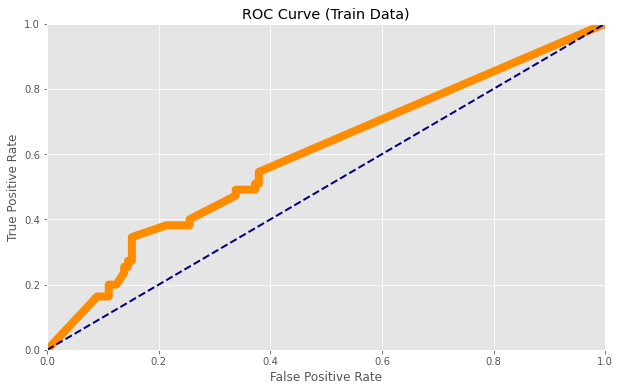

In [70]:
%matplotlib inline

plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

### AUC for training data

In [71]:
# Area under ROC curve
roc_auc_score(y_train,y_scores)

0.5946708463949844

### Precision-Recall Curve for training data and plot it

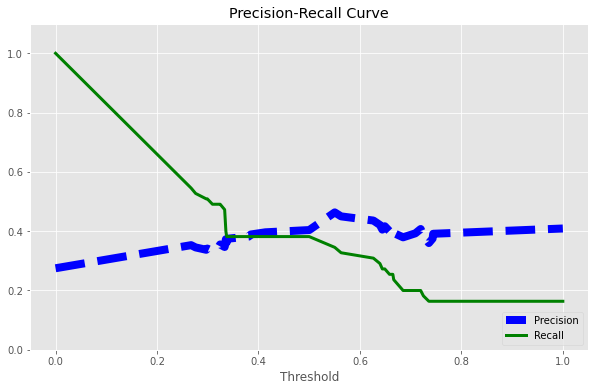

Optimal Threshold:  0.3806860032443908


In [72]:
plt.style.use('ggplot')

# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=5)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


fig = plt.figure(figsize=(10, 6))
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--",  linewidth=8, label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-",  linewidth=3, label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    #plt.xlim([0, 1])
    plt.ylim([0, 1.1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


threshold_optimal = -1
for i in range(len(precisions)):
    if(precisions[i] == recalls[i]):
        threshold_optimal = thresholds[i]

print("Optimal Threshold: ", threshold_optimal)

### Use the Optimal Threshold for Model Evaluation using the Training Data

In [73]:
print("Performance Measures Based on the Default Threshold:\n")


y_train_pred = cross_val_predict(knn, X_train, y_train, cv=5)

# Precision, Recall, F1 Score and Confusion Matrix for the Default Threshold 0.5
precision_train = precision_score(y_train, y_train_pred) 
print("Precision (Default Threshold 0.5) = %f" % precision_train)

recall_train = recall_score(y_train, y_train_pred)
print("Recall (Default Threshold 0.5) = %f" % recall_train)


f1_train = f1_score(y_train, y_train_pred)
print("F1 Score (Default Threshold 0.5) = %f" % f1_train)

print("Confusion Matrix (Default Threshold 0.5)\n", confusion_matrix(y_train, y_train_pred))


print("\n-------------------------------------------------------\n")
print("Performance Measures Based on the Optimal Threshold (from Precision-Recall Curve):")

# Precision, Recall, F1 Score and Confusion Matrix for different threshold

t = threshold_optimal # optimal threshold from precision-recall curve 

# Compute predictions based on new t by using the following method:
#  - Get the probability of the positive class from the 2nd column [:, 1]
#  - If that probability is greater than or equal to t, then the test data belongs to the positive class
y_train_predicted_new = (cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=5)[:,1] > t).astype(int)


precision = precision_score(y_train, y_train_predicted_new) 
print("\nPrecision (Threshold %.2f) = %f" % (t, precision))

recall = recall_score(y_train, y_train_predicted_new)
print("Recall (Threshold %.2f) = %f" % (t, recall))


f1 = f1_score(y_train, y_train_predicted_new)
print("F1 Score = (Threshold %.2f) = %f" % (t, f1))


print("Confusion Matrix (Threshold %.2f)" %  t) 
print(confusion_matrix(y_train, y_train_predicted_new))

Performance Measures Based on the Default Threshold:

Precision (Default Threshold 0.5) = 0.463415
Recall (Default Threshold 0.5) = 0.345455
F1 Score (Default Threshold 0.5) = 0.395833
Confusion Matrix (Default Threshold 0.5)
 [[123  22]
 [ 36  19]]

-------------------------------------------------------

Performance Measures Based on the Optimal Threshold (from Precision-Recall Curve):

Precision (Threshold 0.38) = 0.388889
Recall (Threshold 0.38) = 0.381818
F1 Score = (Threshold 0.38) = 0.385321
Confusion Matrix (Threshold 0.38)
[[112  33]
 [ 34  21]]


### Use the Optimal Threshold for Model Evaluation using the Test Data

In [74]:
print("Test: Performance Measures Based on the Default Threshold:\n")


y_test_pred = knn.predict(X_test)

test_accuracy_knn = np.mean(y_test == y_test_pred)

print("Test Accuracy (Default Threshold 0.5): ", test_accuracy_knn)

# Precision, Recall, F1 Score and Confusion Matrix for the Default Threshold 0.5
precision_test = precision_score(y_test, y_test_pred) 
print("\nTest Precision (Default Threshold 0.5) = %f" % precision_test)

recall_test = recall_score(y_test, y_test_pred)
print("Test Recall (Default Threshold 0.5) = %f" % recall_test)


f1_test = f1_score(y_test, y_test_pred)
print("Test F1 Score (Default Threshold 0.5) = %f" % f1_test)

print("Test Confusion Matrix (Default Threshold 0.5)\n", confusion_matrix(y_test, y_test_pred))


print("\n-------------------------------------------------------\n")
print("Test: Performance Measures Based on the Optimal Threshold (from Precision-Recall Curve):")

# Precision, Recall, F1 Score and Confusion Matrix for different threshold

t = threshold_optimal # optimal threshold from precision-recall curve 

# Compute predictions based on new t by using the following method:
#  - Get the probability of the positive class from the 2nd column [:, 1]
#  - If that probability is greater than or equal to t, then the test data belongs to the positive class

y_test_predicted = (knn.predict_proba(X_test)[:,1] > t).astype(int)

test_accuracy_knn = np.mean(y_test == y_test_predicted)

print("\nTest Accuracy: ", test_accuracy_knn)


precision = precision_score(y_test, y_test_predicted) 
print("\nPrecision (Threshold %.2f) = %f" % (t, precision))

recall = recall_score(y_test, y_test_predicted)
print("Recall (Threshold %.2f) = %f" % (t, recall))


f1 = f1_score(y_test, y_test_predicted)
print("F1 Score = (Threshold %.2f) = %f" % (t, f1))

print("Confusion Matrix (Threshold %.2f)" %  t) 
print(confusion_matrix(y_test, y_test_predicted))

Test: Performance Measures Based on the Default Threshold:

Test Accuracy (Default Threshold 0.5):  0.82

Test Precision (Default Threshold 0.5) = 0.714286
Test Recall (Default Threshold 0.5) = 0.416667
Test F1 Score (Default Threshold 0.5) = 0.526316
Test Confusion Matrix (Default Threshold 0.5)
 [[36  2]
 [ 7  5]]

-------------------------------------------------------

Test: Performance Measures Based on the Optimal Threshold (from Precision-Recall Curve):

Test Accuracy:  0.82

Precision (Threshold 0.38) = 0.666667
Recall (Threshold 0.38) = 0.500000
F1 Score = (Threshold 0.38) = 0.571429
Confusion Matrix (Threshold 0.38)
[[35  3]
 [ 6  6]]


### ROC Curve for Test Data

In [77]:
# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores_test = knn.predict_proba(X_test)[:,1]

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)


print("\nFPR FPR & TPR for Various Threshold Values:")
print("FPR: ", fpr_test)
print("TPR: ", tpr_test)
print("\nThresholds: ", thresholds_test)


FPR FPR & TPR for Various Threshold Values:
FPR:  [0.         0.05263158 0.05263158 0.07894737 0.07894737 0.15789474
 0.18421053 1.        ]
TPR:  [0.         0.16666667 0.5        0.5        0.58333333 0.66666667
 0.66666667 1.        ]

Thresholds:  [2.         1.         0.5        0.41159477 0.35129397 0.33333333
 0.33204769 0.        ]


### Plot the ROC for test data

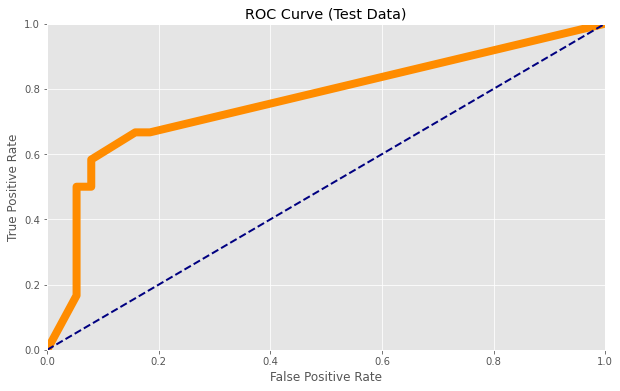

In [83]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Test Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr_test, tpr_test)
plt.show()

### Area Under the ROC Curve (Test Data)

In [79]:
# Area under ROC curve
print("Test AUC: ", roc_auc_score(y_test,y_scores_test))

Test AUC:  0.7642543859649121


## Answer the following question.- Q-1) Which experiment has the highest test accuracy between experiment 1 and 2? Why?

The test accuracy for experiment 2 is 0.7, which is higher than experiment 1 with the test accuracy of 0.6. The test accuracy for experiment 2 is higher because the data is normalized. Note that, KNN model is a distance-based classifier. For non standardized data, it is possible the distance between two points would be overweighted in one direction, so that KNN model might provide inaccurate similarity measure. While implementation of standardization transforms the data to have 0 mean and a variance of 1, which it brings down both the variables to the same scale. Therefore, the variables in the dataset have a similar weightage now, so the KNN model performance and the accuracy of test data are improved.